<a href="https://colab.research.google.com/github/HoloyAz/learn_python/blob/ml/lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1.1
Task 1.1. Develop a Python program to perform the following tasks:
* Input an integer number n.
* Input n integer numbers x1, x2,..., xn and append them into a list L.
* Find the max/min element in L.
* Compute the sum of elements in L.
* Sort the list L in ascending order.
* Show how many positive and negative numbers are in the list L.

Hint: Use min(), max(), sum() functions to find max, min, and sum of the list L; print() to
display values to the console

In [6]:
# Task 1.1
n = int(input("Enter n = "))
L=[]
for i in range(n):
  x = int(input(f"Nhập số nguyên thứ {i+1} : "))
  L.append(x)
  # print(type(x))
print(L)

value_max = max(L)
value_min = min(L)
print("Phần tử lớn nhất là:",value_max)
print("Phần tử nhỏ nhất là:",value_min)

numSum = sum(L)
print("Tổng các phần tử : ",numSum)

print("L ban đầu",L)
L.sort()
print("Danh sách L sau khi sắp xếp:", L)

positive = 0
negative = 0
for i in L :
  if i > 0:
    positive+=1
  else:
    negative+=1
print("Số lượng số dương: ",positive)
print("Số lượng số âm: ", negative)

Enter n = 6
Nhập số nguyên thứ 1 : 4
Nhập số nguyên thứ 2 : 8
Nhập số nguyên thứ 3 : -2
Nhập số nguyên thứ 4 : -4
Nhập số nguyên thứ 5 : 5
Nhập số nguyên thứ 6 : 3
[4, 8, -2, -4, 5, 3]
Phần tử lớn nhất là: 8
Phần tử nhỏ nhất là: -4
Tổng các phần tử :  14
L ban đầu [4, 8, -2, -4, 5, 3]
Danh sách L sau khi sắp xếp: [-4, -2, 3, 4, 5, 8]
Số lượng số dương:  4
Số lượng số âm:  2


## Task 1.2
Task 1.2. Implement a Python function to compute S(n) as follows:
S(n)=1+1.2+1.2.3+…+1.2.3…n, n>0

In [5]:
# Task 1.2
def computeS(n):
  if n <= 0:
        return 0
  sum = 0
  value = 1
  for i in range(1,n+1):
    value = value * i
    sum += value
  return sum

print("Kết quả là",computeS(2))
print("Kết quả là",computeS(3))
print("Kết quả là",computeS(4))

Kết quả là 3
Kết quả là 9
Kết quả là 33


## Task 1.3
Task 1.3. Implement the methods in Account, and AccountManager classes in below
figure:
1. getMaxLikePostByFriend()to find the account having the post with the highest likes
from the list of friends.
2. groupAccountsByPostLike()to group accounts by the number of posts. Where
key=false for accounts having less than 10 posts, otherwise key=true (using
dictionary).
3. filterAccounts(String country) to get all accounts from a given country. The results
are sorted by the number of posts (descending order), and then by name (ascending
order).
4. Expand the problem by taking into account two kinds of accounts, called
VerifiedAccount and NormalProduct. VerifiedAccount has an additional attribute
named fromDate representing the date when the account is verified. Then, modify the
implemented code and test it
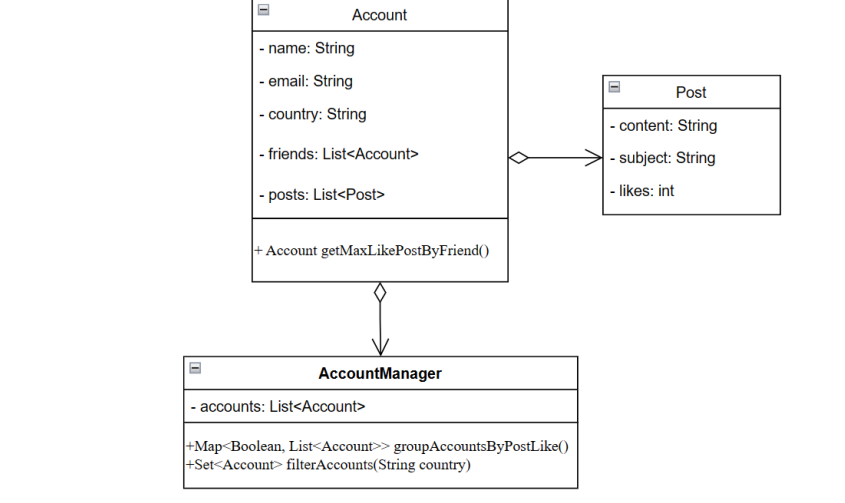

In [4]:
# Task 1.3
from typing import Dict,List
from typing import Set
from datetime import date
class Account:
    def __init__(self, name: str, country: str, email: str):
        self._name = name
        self._email = email
        self._country = country
        self._friends: List[Account] = []
        self._posts: List[Post] = []
    def __str__(self):
        return f"Account(name={self._name}, email={self._email}, country={self._country})"

    # tim tai khoan co post nhieu like tu danh sach ban be
    def get_max_like_post_by_friend(self):
      post_max_like = None
      max_likes = 0
      acc_max_like = ""

      for friend in self._friends:
          for post in friend._posts:
              if post._likes > max_likes:
                  max_likes = post._likes
                  post_max_like = post
                  acc_max_like=friend
      # print(acc_max_like)
      return acc_max_like
class VerifiedAccount(Account):
    def __init__(self, name, country, posts, fromDate):
        super().__init__(name, country, posts)
        self._fromDate = fromDate
    def __str__(self):
        return f"Post(content={self.content}, _subject={self.__subject}, _likes={self.__likes})"
class NormalAccount(Account):
    def __init__(self, name, country, posts):
        super().__init__(name, country, posts)
    def __str__(self):
        return f"Post(content={self.content}, _subject={self.__subject}, _likes={self.__likes})"
class Post:
  def __init__(self, content: str, subject: str, likes: int):
        self._content = content
        self._subject = subject
        self._likes = likes
  def __str__(self):
        return f"Post(content={self.content}, _subject={self.__subject}, _likes={self.__likes})"

class AccountManager:
  def __init__(self ):
        self._accounts = []
  def add_account(self, account):
        self._accounts.append(account)
  # nhom lai theo so bia viet
  def group_accounts_by_post_like(self) -> Dict[bool, List["Account"]]:
        grouped_accounts = {True: [], False: []}

        for account in self._accounts:
            if len(account._posts) >= 10:
                grouped_accounts[True].append(account)
            else:
                grouped_accounts[False].append(account)

        return grouped_accounts
  # 3 loc theo quoc gia va sap xep
  def filter_accounts(self, country: str) -> Set["Account"]:
    # lay ra cac tai khoan theo quoc gia
        accounts_country = {account for account in self._accounts if account._country == country}
        # sap xep
        sorted_accounts = sorted(accounts_country, key=lambda x: (len(x._posts), x._name,), reverse=True)
        return sorted_accounts
# Tạo các tài khoản và bài viết giả định
account1 = Account("nguyena", "JP", "nguyena@gmail.com")
account2 = Account("nguyenb", "VN", "nguyenb@gmail.com")
account3 = Account("nguyenc", "VN", "nguyenc@gmail.com")

post1 = Post("Post 1", "Subject 1", 10)
post2 = Post("Post 2", "Subject 2", 15)
post3 = Post("Post 3", "Subject 3", 20)
post4 = Post("Post 4", "Subject 4", 25)
post5 = Post("Post 5", "Subject 5", 30)

# Gán bài viết cho tài khoản
account1._posts = [post1, post5,post3,post4,post2,post1,post2,post3,post4,post5]
account2._posts = [post2,post4,post1]
account3._posts = [post3, post1]

# Gán bạn bè cho tài khoản
account1._friends = [account2, account3]
account2._friends = [account1, account3]
account3._friends = [account1, account2]

# Tạo một AccountManager và thêm các tài khoản
account_manager = AccountManager()
account_manager.add_account(account1)
account_manager.add_account(account2)
account_manager.add_account(account3)

# 1. get_max_like_post_by_friend()
acc = account1.get_max_like_post_by_friend()
print("Tài khoản có post nhiều like nhất trong dach sách bạn bè",acc)

# 2. Kiểm tra phương thức group_accounts_by_post_like()
grouped_accounts = account_manager.group_accounts_by_post_like()

# In ra kết quả
print("Tài khoản có từ 10 post trở lên:")
for account in grouped_accounts[True]:
    print(f"- {account._name}")

print("\nTài khoản có từ 10 post trở xuống:")
for account in grouped_accounts[False]:
    print(f"- {account._name}")

# 3
# Kiểm tra phương thức filter_accounts(country)
filtered_accounts = account_manager.filter_accounts("VN")
print("\nKết quả sau khi lọc là")
# In ra kết quả
for account in filtered_accounts:
    print(f"Name: {account._name}, Country: {account._country}")
print()

# 4 Mở rộng
accounts = [
    VerifiedAccount("nguyenc", "JP", ["post1", "post2", "post4"], date(2024, 3, 3)),
    VerifiedAccount("nguyend", "VN", ["post3"], date(2024, 3, 3)),
    NormalAccount("nguyene", "VN", ["post4", "post5"]),
]

sorted_accounts = sorted(accounts, key=lambda x: (len(x._posts), x._name), reverse=True)

for account in sorted_accounts:
    if isinstance(account, VerifiedAccount):
        print(f"Name: {account._name}, Country: {account._country}, Verified Date: {account._fromDate}")
    elif isinstance(account, NormalAccount):
        print(f"Name: {account._name}, Country: {account._country}")


Tài khoản có post nhiều like nhất trong dach sách bạn bè Account(name=nguyenb, email=nguyenb@gmail.com, country=VN)
Tài khoản có từ 10 post trở lên:
- nguyena

Tài khoản có từ 10 post trở xuống:
- nguyenb
- nguyenc

Kết quả sau khi lọc là
Name: nguyenb, Country: VN
Name: nguyenc, Country: VN

Name: nguyene, Country: VN
Name: nguyend, Country: VN, Verified Date: 2024-03-03
Name: nguyenc, Country: JP, Verified Date: 2024-03-03


## Task 2.1
Task 2.1. Develop a NumPy program to create an array with values ranging from 10 to 25,
then reverse the array (the first element becomes last).


In [3]:
# Task 2.1
import numpy as np
arr = np.arange(10, 26)
print("Mảng ban đầu : ",arr)

reverse_arr = np.flip(arr)
print("Mảng đảo ngược : ",reverse_arr)

Mảng ban đầu :  [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]
Mảng đảo ngược :  [25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10]


## Task 2.2
Task 2.2. Develop a NumPy program that constructs an array by repeating.

Input: [1, 2, 3, 4]

Expected Output:

Original array: [1, 2, 3, 4]

Repeating 2 times: [1 2 3 4 1 2 3 4]

Repeating 3 times: [1 2 3 4 1 2 3 4 1 2 3 4]

In [2]:
# Task 2.2
import numpy as np

# Input array
arr = np.array([1, 2, 3, 4])
# print("Original array:", arr)

# # Repeat 2 times
# repeat_twice = np.tile(arr, 2)
# print("Repeating 2 times:", repeat_twice)

# Repeat 3 times
# repeat_thrice = np.tile(arr, 3)
# print("Repeating 3 times:", repeat_thrice)

# print("Use method")
def repeatArr(arr, times):
  repeat_arr = np.tile(arr, times)
  print(repeat_arr)

print("Original array:", arr)
# Repeat 2 times
print("Repeating 2 times:")
repeatArr(arr,2)
# Repeat 3 times
print("Repeating 3 times:")
repeatArr(arr,3)


Original array: [1 2 3 4]
Repeating 2 times:
[1 2 3 4 1 2 3 4]
Repeating 3 times:
[1 2 3 4 1 2 3 4 1 2 3 4]


## Task 2.3
Task 2.3. Develop a NumPy program to replace all elements of the NumPy array that are less
than a specified value by this specified value.
Input:
[[ 0.42 0.48 0.32]
[ 0.74 0.58 0.38]
[ 0.51 0.34 0.15 ]]
Expected Output:

Original array:
[[ 0.42 0.48 0.32]
[ 0.74 0.58 0.38]
[ 0.51 0.34 0.15 ]]
Replace all elements of the original array with .5 for values which are greater than .5
[[ 0.42 0.48 0.32]
[ 0.5 0.5 0.38]
[ 0.5 0.34 0.15 ]]

In [1]:
# Task 2.3
import numpy as np

arr = np.array([[0.42, 0.48, 0.32],
                [0.74, 0.58, 0.38],
                [0.51, 0.34, 0.15]])
print("Original array:")
print(arr)

# replace
# arr[arr < 0.5] = 0.5
new_arr = np.where(arr < 0.5, 0.5, arr)

# print("\nReplace all elements of the original array which are less than 0.5")
# print(arr)
print("\nMang thay thế khi có giá trị nhỏ hơn 0.5")
print(new_arr)


Original array:
[[0.42 0.48 0.32]
 [0.74 0.58 0.38]
 [0.51 0.34 0.15]]

Mang thay thế khi có giá trị nhỏ hơn 0.5
[[0.5  0.5  0.5 ]
 [0.74 0.58 0.5 ]
 [0.51 0.5  0.5 ]]
